In [17]:
from dotenv import load_dotenv
import psycopg2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
load_dotenv()

conn = psycopg2.connect(dbname="postgres", user="postgres", password=os.environ["POSTGRES_PASSWORD"])
cur = conn.cursor()

In [37]:
query = "SELECT mart.fct_verkauf.kaufdatum, mart.fct_verkauf.lieferdatum, mart.fct_verkauf.rabatt_pct, mart.dim_fahrzeug.hersteller_code, mart.dim_kunde.kunde_account, mart.fct_verkauf.kaufpreis FROM mart.fct_verkauf LEFT JOIN mart.dim_fahrzeug ON mart.fct_verkauf.fahrzeug_id = mart.dim_fahrzeug.fahrzeug_id LEFT JOIN mart.dim_kunde ON mart.fct_verkauf.kunde_id = mart.dim_kunde.kunde_id;"

cur.execute(query)

rows = cur.fetchall()

In [44]:
data = pd.DataFrame(rows, columns=["kaufdatum", "lieferdatum", "rabatt_pct", "hersteller_code", "kunde_account", "kaufpreis"])

In [45]:
data = data.sort_values(by="kaufdatum")

In [46]:
data

,kaufdatum,lieferdatum,rabatt_pct,hersteller_code,kunde_account,kaufpreis
10,2018-06-12,2018-06-18,7,SNT,K001,33000
14,2019-03-18,2019-03-25,8,WVW,K004,30000
7,2019-07-01,2019-07-10,9,WBA,K003,32000
3,2019-09-18,2019-09-25,4,WPO,K004,26000
1,2019-11-25,2019-12-01,3,SNT,K002,22000
12,2019-12-10,2019-12-15,9,SNT,K003,31000
0,2020-01-10,2020-01-15,5,SNT,K001,25000
5,2020-03-05,2020-03-10,8,WB1,K001,30000
11,2020-04-30,2020-05-05,4,SNT,K002,28000
2,2020-05-03,2020-05-08,7,SNT,K003,28000


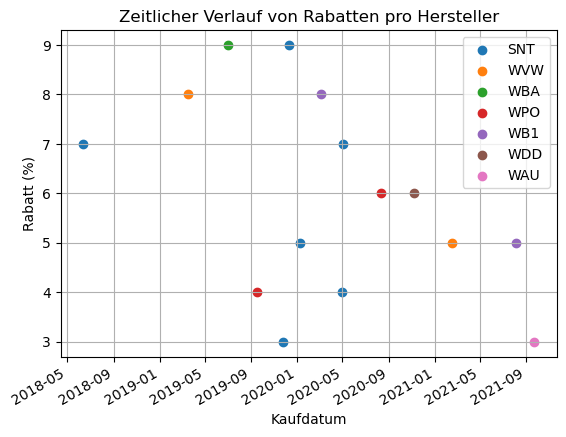

In [54]:
fig, ax = plt.subplots()
ax.grid()

for hersteller_code in data.hersteller_code.unique():
    hersteller_data = data[data.hersteller_code == hersteller_code]
    ax.scatter(hersteller_data.kaufdatum, hersteller_data.rabatt_pct, label=hersteller_code)

fig.autofmt_xdate()

ax.set_xlabel("Kaufdatum")
ax.set_ylabel("Rabatt (%)")
ax.set_title("Zeitlicher Verlauf von Rabatten pro Hersteller")
ax.legend()

fig.savefig("datum_rabatt.jpg",dpi=200)

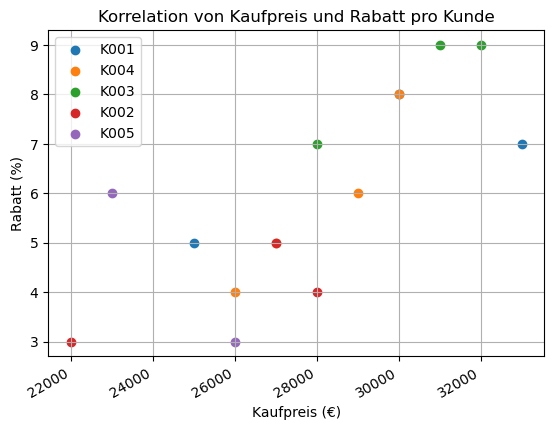

In [55]:
fig, ax = plt.subplots()
ax.grid()

for kunde_account in data.kunde_account.unique():
    kunde_data = data[data.kunde_account == kunde_account]
    ax.scatter(kunde_data.kaufpreis, kunde_data.rabatt_pct, label=kunde_account)

fig.autofmt_xdate()

ax.set_xlabel("Kaufpreis (€)")
ax.set_ylabel("Rabatt (%)")
ax.set_title("Korrelation von Kaufpreis und Rabatt pro Kunde")
ax.legend()

fig.savefig("kaufpreis_rabatt.jpg",dpi=200)